**HYPOTHESIS GENERATION**

# here are four (04) hypothesis that we would want to test after the EDA:

# On basis of item:
# Item visibility in store: The location of product in a store will impact sales. Ones which are right at entrance will catch the eye of customer first rather than the ones in back.
# Product Frequency: More frequent products will have high Sales.

**On basis of store:**
# City type: Stores located in urban cities should have higher sales because of the higher income levels of people there.
# Store capacity: Stores which are very big in size should have higher sales as they act like one-stop-shops and people would prefer getting everything from one place.

**LOADING THE PACKAGES**

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**CONNECTING TO GOOGLE DRIVE**

In [89]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**LOADING THE DATASET**

In [90]:
train = pd.read_csv(r"/content/drive/MyDrive/Train.csv")
test  = pd.read_csv(r"/content/drive/MyDrive/Test.csv")
train


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [91]:
test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


**SEEING THE ROWS AND COLUMNS OF TRAINING AND TESTING DATA**

In [92]:
print(f"training set (row, col): {train.shape}\n\ntesting set (row, col): {test.shape}")

training set (row, col): (8523, 12)

testing set (row, col): (5681, 11)


**SHOWING THE DATATYPE OF THE COLUMNS**

In [93]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

**COLUMNS OF THE TRAINING DATASET**

In [94]:
print("Columns in the DataFrame:")
print(train.columns)

Columns in the DataFrame:
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


**THE UNIQUE VALUES IN THE EACH COLUMNS**

In [95]:
for column in train.columns:
    unique_values = train[column].unique()
    print(f"Unique values in {column}: {unique_values}")

Unique values in Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Unique values in Item_Weight: [ 9.3    5.92  17.5   19.2    8.93  10.395 13.65     nan 16.2   11.8
 18.5   15.1   17.6   16.35   9.    13.35  18.85  14.6   13.85  13.
  7.645 11.65   5.925 19.25  18.6   18.7   17.85  10.     8.85   9.8
 13.6   21.35  12.15   6.42  19.6   15.85   7.39  10.195  9.895 10.895
  7.905  9.195  8.365  7.97  17.7   19.35   8.645 15.6   18.25   7.855
  7.825  8.39  12.85  19.     5.905  7.76  16.75  15.5    6.055  6.305
 20.85  20.75   8.895 19.7    8.75  13.3    8.31  19.75  17.1   10.5
  6.635 14.15   8.89   9.1    7.5   16.85   7.485 11.6   12.65  20.25
  8.6   12.6    8.88  20.5   13.5    7.235  6.92   8.02  12.8   16.6
 14.    16.    21.25   7.365 18.35   5.465  7.27   6.155 19.5   15.2
 14.5   13.1   12.3   11.1   11.3    5.75  11.35   6.525 10.3    5.78
 11.85  18.75   5.26  16.1    9.5   13.8   14.65   6.67   6.11  17.2
  6.32   4.88   5.425 14.1    7.55  17.25  12. 

**DATASET INFORMATION**

In [96]:
print("Dataset Information:")
print(train.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None


**SUMMARY STATISTICS**

In [97]:
print("\nSummary Statistics:")
print(train.describe())


Summary Statistics:
       Item_Weight  Item_Visibility     Item_MRP  Outlet_Establishment_Year  \
count  7060.000000      8523.000000  8523.000000                8523.000000   
mean     12.857645         0.066132   140.992782                1997.831867   
std       4.643456         0.051598    62.275067                   8.371760   
min       4.555000         0.000000    31.290000                1985.000000   
25%       8.773750         0.026989    93.826500                1987.000000   
50%      12.600000         0.053931   143.012800                1999.000000   
75%      16.850000         0.094585   185.643700                2004.000000   
max      21.350000         0.328391   266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


**MISSING VALUES IN THE DATASET**

In [98]:
print("\nMissing Values:")
print(train.isnull().sum())


Missing Values:
Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


**UNIQUE VALUES IN CATEGORICAL COLUMNS**

In [99]:
print("\nUnique Values in Categorical Columns:")
for column in train.select_dtypes(include='object').columns:
    print(f"{column}: {train[column].unique()}")


Unique Values in Categorical Columns:
Item_Identifier: ['FDA15' 'DRC01' 'FDN15' ... 'NCF55' 'NCW30' 'NCW05']
Item_Fat_Content: ['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
Item_Type: ['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
Outlet_Identifier: ['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
Outlet_Size: ['Medium' nan 'High' 'Small']
Outlet_Location_Type: ['Tier 1' 'Tier 3' 'Tier 2']
Outlet_Type: ['Supermarket Type1' 'Supermarket Type2' 'Grocery Store'
 'Supermarket Type3']


**SEEING THE NULLVALUES IN DECENDING ORDER OF TRAINING AND TESTING DATA**

In [100]:
print("Train:\n")
print(train.isnull().sum().sort_values(ascending=False),"\n\n",train.isnull().sum()/train.shape[0] *100,"\n\n")
print("Test:\n")
print(test.isnull().sum().sort_values(ascending=False),"\n\n",test.isnull().sum()/test.shape[0] *100,"\n\n")

Train:

Outlet_Size                  2410
Item_Weight                  1463
Item_Identifier                 0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64 

 Item_Identifier               0.000000
Item_Weight                  17.165317
Item_Fat_Content              0.000000
Item_Visibility               0.000000
Item_Type                     0.000000
Item_MRP                      0.000000
Outlet_Identifier             0.000000
Outlet_Establishment_Year     0.000000
Outlet_Size                  28.276428
Outlet_Location_Type          0.000000
Outlet_Type                   0.000000
Item_Outlet_Sales             0.000000
dtype: float64 


Test:

Outlet_Size                  1606
Item_Weight                   976
Item_Id

**HERE WE UNDERSTAND THAT THE NULL VALUES IS PRESENT IN OUTLETSIZE AND ITEMWEIGHT**

In [101]:
print("Outlet_Size:\n", train.Outlet_Size.value_counts(), "\n\n")
print("Item_Weight:\n", train.Item_Weight.value_counts(), "\n\n")

Outlet_Size:
 Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64 


Item_Weight:
 12.150    86
17.600    82
13.650    77
11.800    76
15.100    68
          ..
7.275      2
7.685      1
9.420      1
6.520      1
5.400      1
Name: Item_Weight, Length: 415, dtype: int64 




**FILLING THE NULLVALUES OF OUTLETSIZE WITH MODE**

In [102]:
print("test mode, train mode\n",[train['Outlet_Size'].mode().values[0], test['Outlet_Size'].mode().values[0]])

test mode, train mode
 ['Medium', 'Medium']


**FILLING THE NULLVALUES OF OUTLETSIZE WITH FILLNA**

In [103]:
train['Outlet_Size'] = train['Outlet_Size'].fillna(train['Outlet_Size'].dropna().mode().values[0])

test['Outlet_Size'] = test['Outlet_Size'].fillna(test['Outlet_Size'].dropna().mode().values[0])

**NOW THE NULLVALUES OF OUTLETSIZE IS NILL**

In [104]:
train['Outlet_Size'].isnull().sum(),test['Outlet_Size'].isnull().sum()

(0, 0)

**EXPLORATORY DATA ANALYSIS**

**LIST OF ALL CATEGORIC COLUMNS**

In [105]:
num = train.select_dtypes('number').columns.to_list()
#list of all the categoric columns
cat = train.select_dtypes('object').columns.to_list()

#numeric df
BM_num =  train[num]
#categoric df
BM_cat = train[cat]

[train[category].value_counts() for category in cat[1:]]

[Low Fat    5089
 Regular    2889
 LF          316
 reg         117
 low fat     112
 Name: Item_Fat_Content, dtype: int64,
 Fruits and Vegetables    1232
 Snack Foods              1200
 Household                 910
 Frozen Foods              856
 Dairy                     682
 Canned                    649
 Baking Goods              648
 Health and Hygiene        520
 Soft Drinks               445
 Meat                      425
 Breads                    251
 Hard Drinks               214
 Others                    169
 Starchy Foods             148
 Breakfast                 110
 Seafood                    64
 Name: Item_Type, dtype: int64,
 OUT027    935
 OUT013    932
 OUT049    930
 OUT046    930
 OUT035    930
 OUT045    929
 OUT018    928
 OUT017    926
 OUT010    555
 OUT019    528
 Name: Outlet_Identifier, dtype: int64,
 Medium    5203
 Small     2388
 High       932
 Name: Outlet_Size, dtype: int64,
 Tier 3    3350
 Tier 2    2785
 Tier 1    2388
 Name: Outlet_Location_Type,

**REPLACING SOME ITEMS IN ITEM FAT CONTENT**

In [106]:
train['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

test['Item_Fat_Content'].replace(['LF', 'low fat', 'reg'],
                                  ['Low Fat','Low Fat','Regular'],inplace = True)

train.Item_Fat_Content.value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

**SEE THE CHANGES IN THE TRAINING DATASET**

In [107]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


**ADDING THE NEW COLUMN OUTLET_AGE**

In [108]:
train['Outlet_Age'], test['Outlet_Age']= train['Outlet_Establishment_Year'].apply(lambda year: 2020 - year), test['Outlet_Establishment_Year'].apply(lambda year: 2020 - year)

train['Outlet_Age'].head
test['Outlet_Age'].head

<bound method NDFrame.head of 0       21
1       13
2       22
3       13
4       35
        ..
5676    23
5677    11
5678    18
5679    13
5680    18
Name: Outlet_Age, Length: 5681, dtype: int64>

****

**VISUALIZING THE LOWFAT AND REGULAR FAT IN ITEM FAT CONTENT**

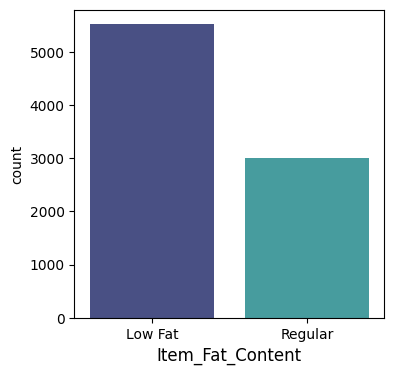

In [109]:
plt.figure(figsize=(4, 4))
sns.countplot(x='Item_Fat_Content', data=train, palette='mako')
plt.xlabel('Item_Fat_Content', fontsize=12)
plt.show()

**VISUALIZING THE ITEM_TYPE**

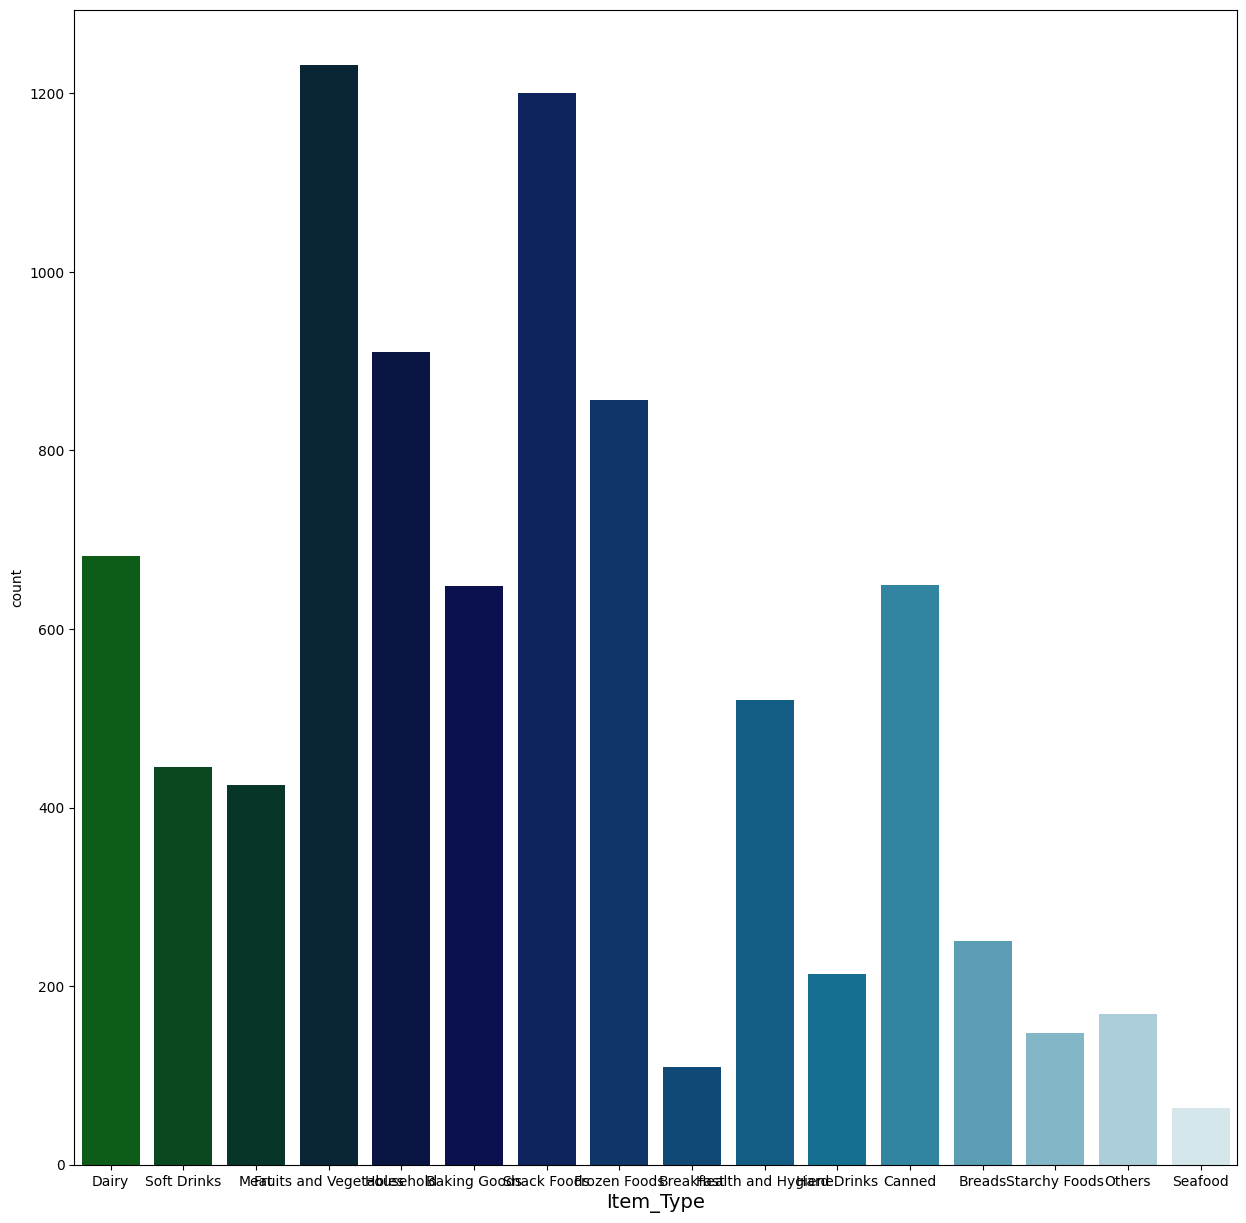

In [110]:
plt.figure(figsize=(15,15))
sns.countplot(x='Item_Type' , data=train ,palette='ocean')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

**ITEM_FAT_CONTENT**

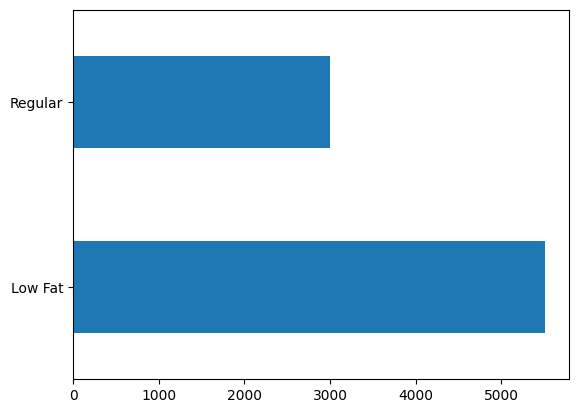

In [111]:
# Lets look at the column Item_Fat_Content
train['Item_Fat_Content'].value_counts().plot(kind='barh')
plt.show()

**ITEM OUTLET SALES**

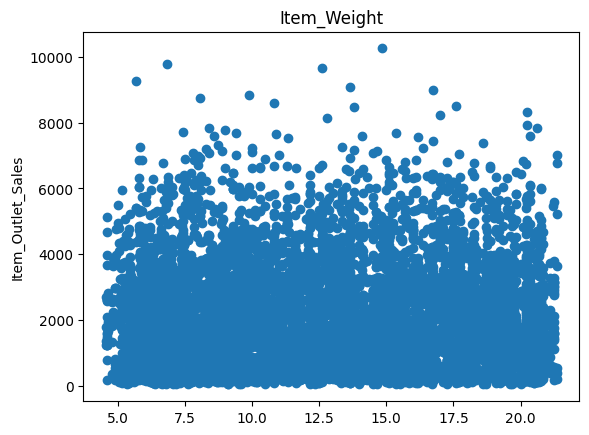

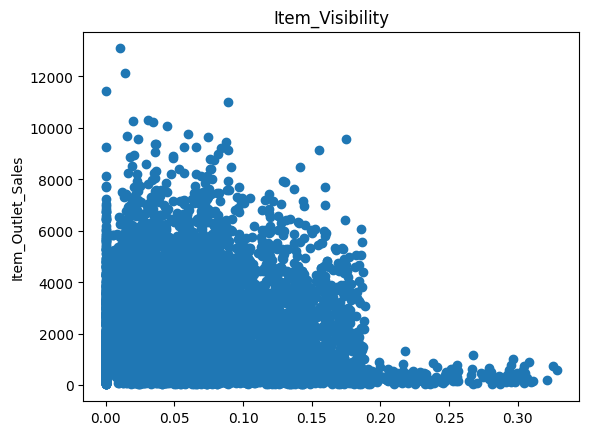

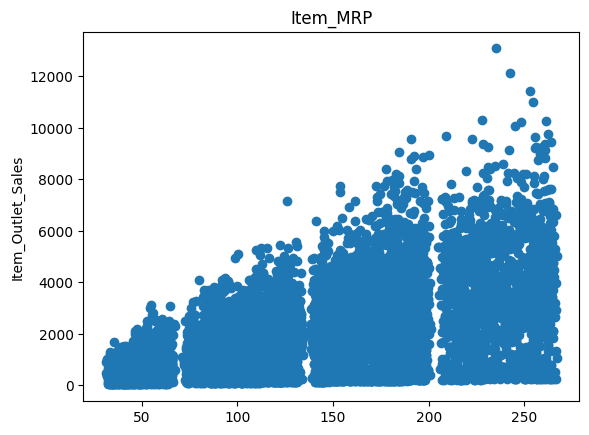

In [112]:
for numeric in BM_num[num[:3]]:
    plt.scatter(BM_num[numeric], BM_num['Item_Outlet_Sales'])
    plt.title(numeric)
    plt.ylabel('Item_Outlet_Sales')
    plt.show()

**BIVARIATE ANALYSIS**

**BARPLOT OF ITEM_TYPE AND ITEM OUTLET SALES**

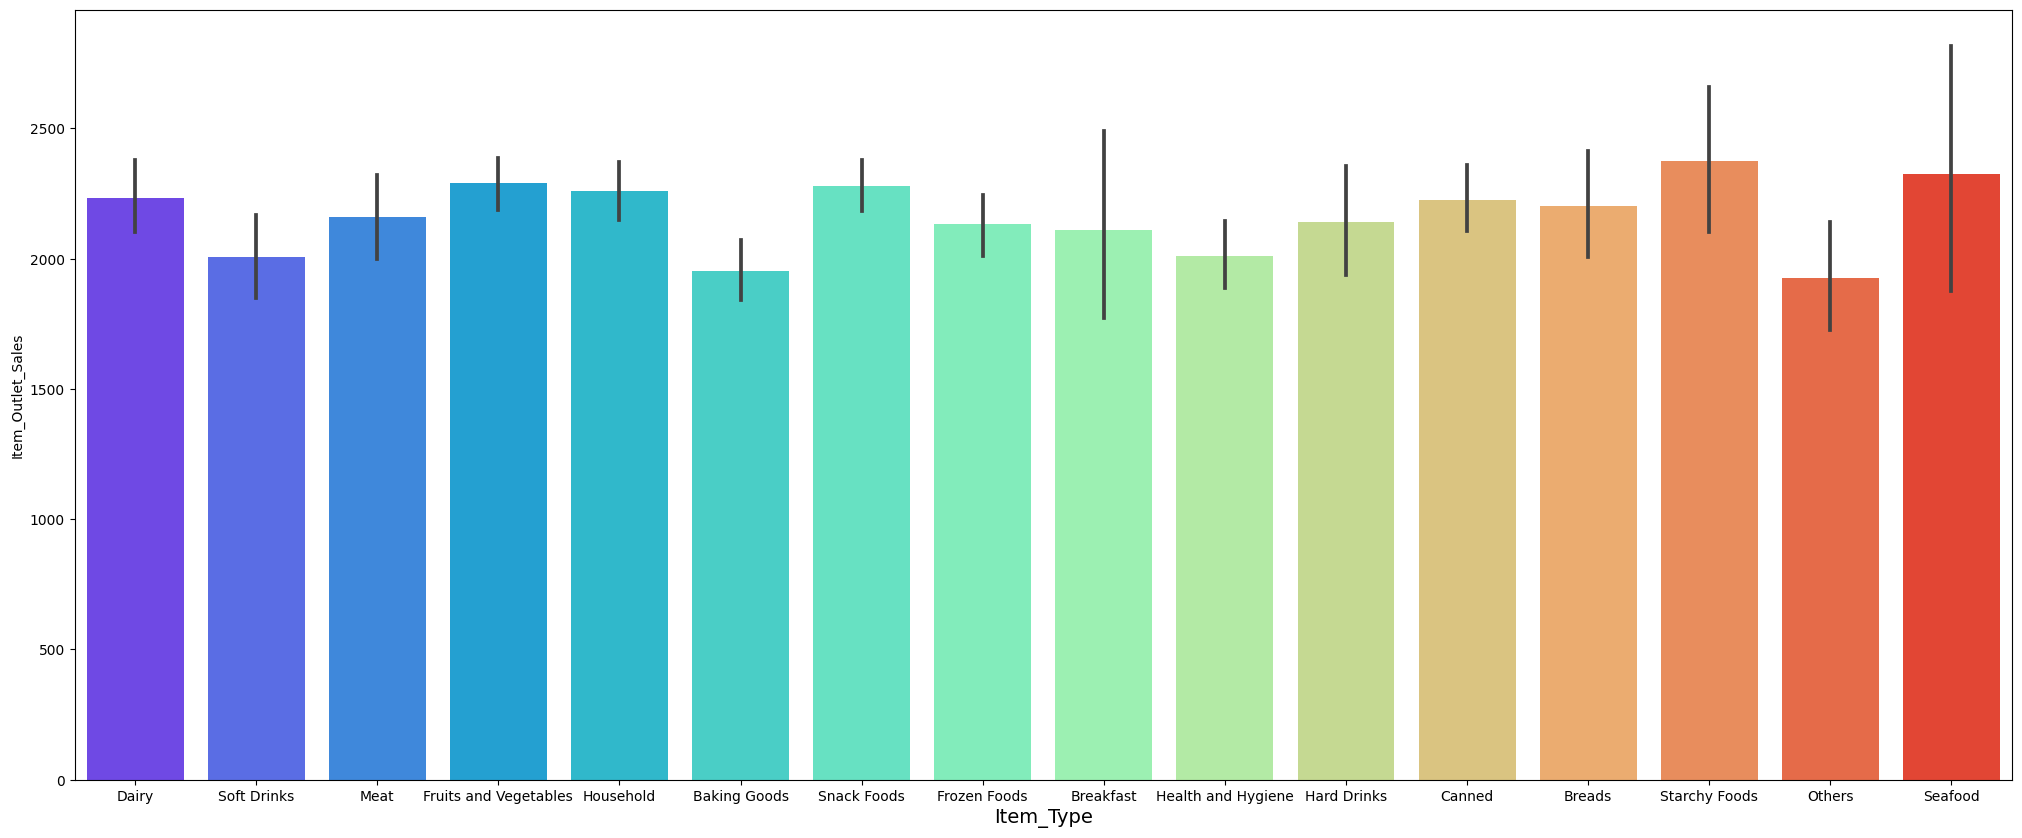

In [113]:
plt.figure(figsize=(25, 10))
sns.barplot(x='Item_Type', y='Item_Outlet_Sales', data=train, palette='rainbow')
plt.xlabel('Item_Type', fontsize=14)
plt.show()

**BOXPLOT**

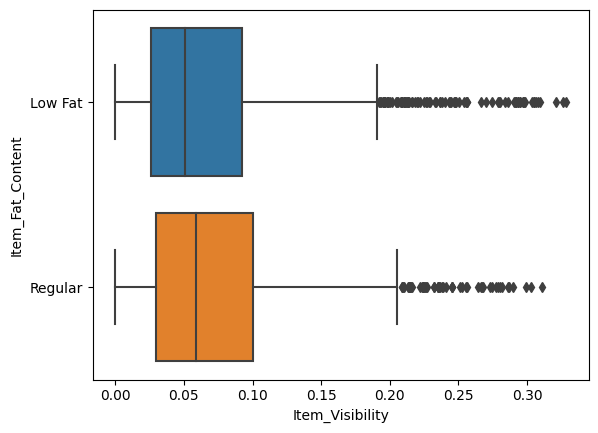

In [114]:
# Lets look at the columns Item_Visibility and Item_Fat_Content
sns.boxplot(x = train['Item_Visibility'], y = train['Item_Fat_Content'])
plt.show()

**VISUALIZING THE SUBPLOTS OF BARGRAPH TRAINING AND TESTING**

Visualizing Quantitative Data Spread


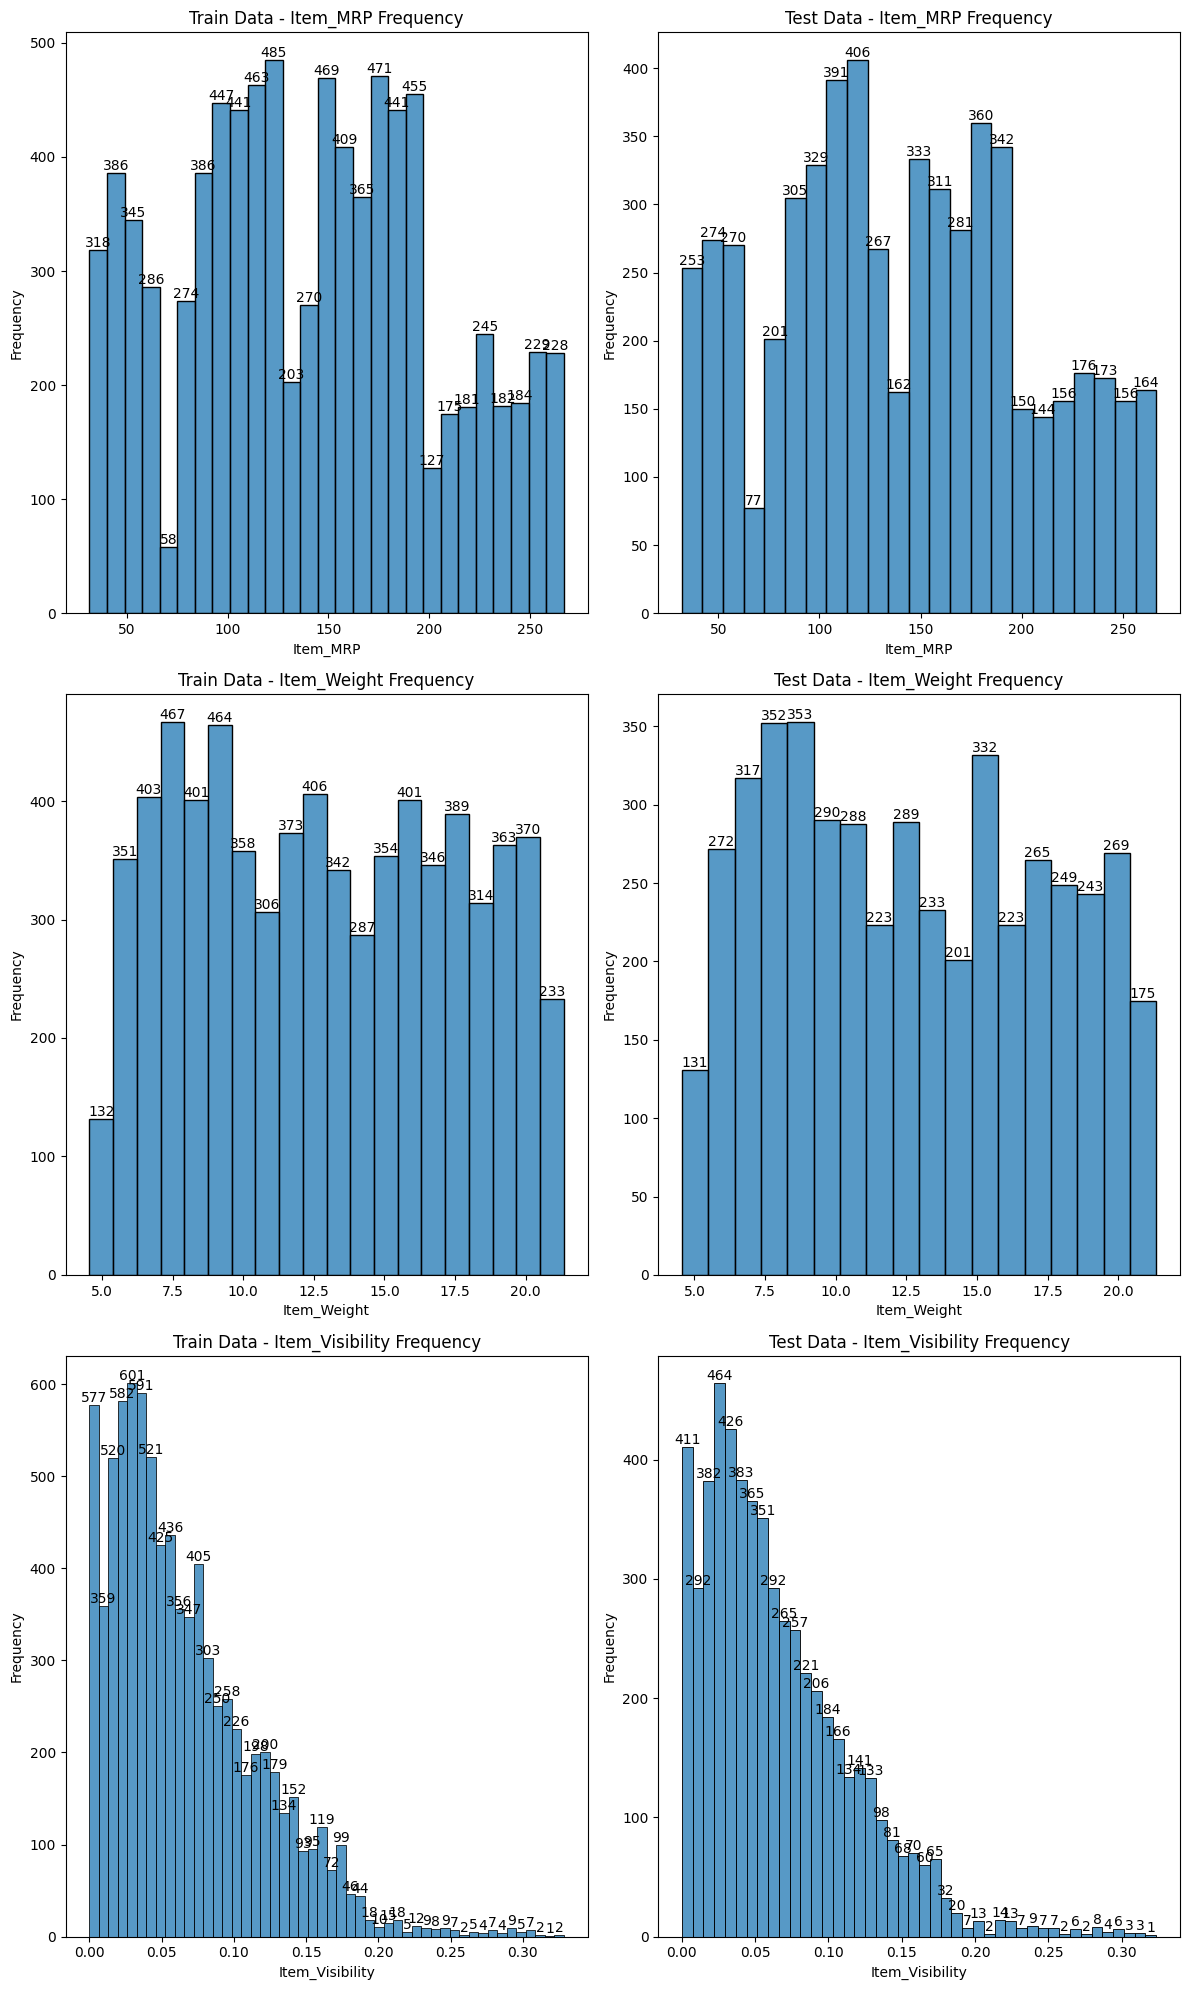

In [115]:
fig, axes = plt.subplots(3, 2, figsize=(12, 20))
columns = ["Item_MRP", "Item_Weight", "Item_Visibility"]
print("Visualizing Quantitative Data Spread")
for i, label in enumerate(columns):
    row = i
    ax1 = sns.histplot(train[label], ax=axes[row, 0])
    ax1.set_xlabel(label)
    ax1.set_ylabel("Frequency")
    ax1.set_title(f"Train Data - {label} Frequency")
    for container in ax1.containers:
        ax1.bar_label(container, label_type="edge")
    ax2 = sns.histplot(test[label], ax=axes[row, 1])
    ax2.set_xlabel(label)
    ax2.set_ylabel("Frequency")
    ax2.set_title(f"Test Data - {label} Frequency")
    for container in ax2.containers:
        ax2.bar_label(container, label_type="edge")
plt.tight_layout()
plt.show()

**MISSING VALUES TREATMENT**

In [116]:
#train
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].dropna().mean())

#test
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].dropna().mean())

#checking if we filled missing values
train['Item_Weight'].isnull().sum(),test['Item_Weight'].isnull().sum()

(0, 0)

**BOXPLOT FOR ITEM_WEIGHT**

Text(0.5, 1.0, 'Item_Weight Boxplot')

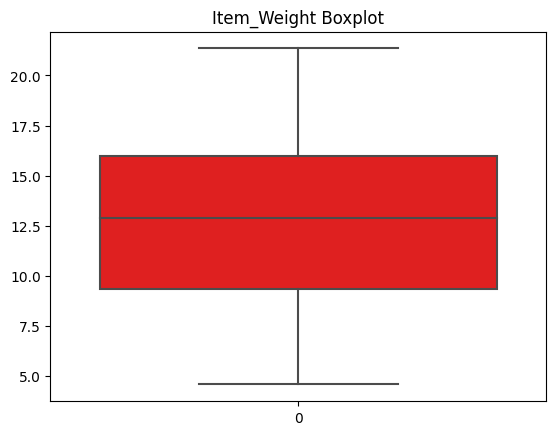

In [117]:
sns.boxplot(data=train['Item_Weight'],orient="v", color = 'r')
plt.title("Item_Weight Boxplot")

**FEATURE ENGINEERING**

In [118]:
BM_cat.apply(lambda x: x.nunique())

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                3
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

**LABEL ENCODING**

In [119]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'train' is your DataFrame
Label = ['Item_Fat_Content', 'Outlet_Size', 'Outlet_Location_Type']

le = LabelEncoder()

for i in Label:
    train[i] = le.fit_transform(train[i])
    test[i] = le.fit_transform(test[i])

train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,21
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,11
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,21
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,22
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,33


**ONE HOT ENCODING**

In [120]:
from sklearn.preprocessing import OneHotEncoder

cols = ['Item_Type', 'Outlet_Type']

# Apply one-hot encoder
OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
train_oh = pd.DataFrame(OH_encoder.fit_transform(train[cols])).astype('int64')
test_oh = pd.DataFrame(OH_encoder.transform(test[cols])).astype('int64')  # Use transform instead of fit_transform for test data

# Get feature columns
train_oh.columns = OH_encoder.get_feature_names_out(cols)
test_oh.columns = OH_encoder.get_feature_names_out(cols)

# One-hot encoding removed index; put it back
train_oh.index = train.index
test_oh.index = test.index

# Add one-hot encoded columns to our main df, new name: train_fe, test_fe (means feature engineered)
train_fe = pd.concat([train, train_oh], axis=1)
test_fe = pd.concat([test, test_oh], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


**DATA PREPROCESSING**

**DROPING IRRELEVANT COLUMNS**

In [121]:
train_fe  = train_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)
test_fe = test_fe.drop(['Item_Identifier','Outlet_Identifier','Outlet_Establishment_Year','Outlet_Type','Item_Type'],axis=1)

In [122]:
train_fe.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_MRP,Outlet_Size,Outlet_Location_Type,Item_Outlet_Sales,Outlet_Age,Item_Type_Baking Goods,Item_Type_Breads,...,Item_Type_Meat,Item_Type_Others,Item_Type_Seafood,Item_Type_Snack Foods,Item_Type_Soft Drinks,Item_Type_Starchy Foods,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,9.30,0,0.016047,249.8092,1,0,3735.1380,21,0,0,...,0,0,0,0,0,0,0,1,0,0
1,5.92,1,0.019278,48.2692,1,2,443.4228,11,0,0,...,0,0,0,0,1,0,0,0,1,0
2,17.50,0,0.016760,141.6180,1,0,2097.2700,21,0,0,...,1,0,0,0,0,0,0,1,0,0
3,19.20,1,0.000000,182.0950,1,2,732.3800,22,0,0,...,0,0,0,0,0,0,1,0,0,0
4,8.93,0,0.000000,53.8614,0,2,994.7052,33,0,0,...,0,0,0,0,0,0,0,1,0,0


**MACHINE LEARNING MODELS**

In [123]:
from sklearn.model_selection import train_test_split

#metrics
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import mean_squared_error as MSE
from sklearn.metrics import r2_score as R2
from sklearn.model_selection  import cross_val_score as CVS

**SPLITTING THE DATA**

In [124]:
y = train_fe['Item_Outlet_Sales']
X = train_fe.drop('Item_Outlet_Sales', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.8, random_state = 0)

In [125]:
def cross_val(model_name,model,X,y,cv):

    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

**LINEAR REGRESSION**

**IMPORTS**

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

**SPLITTING TRAINING AND TESTING**

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)


**LINEAR REGRESSION MODEL**

In [128]:
LR = LinearRegression()


**MODEL TRAINING**

In [129]:
LR.fit(X_train, y_train)


LinearRegression()

**MODEL PREDICTION**

In [130]:
y_predict = LR.predict(X_test)


**EVALUATION METRICS**

In [131]:
LR_MAE = mean_absolute_error(y_test, y_predict)
LR_MSE = mean_squared_error(y_test, y_predict)
LR_R2 = r2_score(y_test, y_predict)
LR_CV = round(cross_val_score(LR, X, y, cv=5).mean(), 4)


**PRINT RESULTS**

In [132]:
print(f" Mean Absolute Error: {round(LR_MAE, 2)}")
print(f" Mean Squared Error: {round(LR_MSE, 2)}")
print(f" R^2 Score: {round(LR_R2, 4)}")
print(f" Cross-Validation Score: {LR_CV}")


 Mean Absolute Error: 844.84
 Mean Squared Error: 1288452.93
 R^2 Score: 0.5526
 Cross-Validation Score: 0.558


**CROSS VALIDATION RESULTS**

In [133]:
cv_scores = cross_val_score(LR, X, y, cv=5)
average_cv_score = cv_scores.mean()

print(f"\n Cross-Validation Scores:")
for i, score in enumerate(cv_scores, 1):
    print(f" Fold {i}: {round(score, 2)}")
print(f"\n Average Cross-Validation Score: {round(average_cv_score, 4)}")



 Cross-Validation Scores:
 Fold 1: 0.57
 Fold 2: 0.55
 Fold 3: 0.55
 Fold 4: 0.56
 Fold 5: 0.56

 Average Cross-Validation Score: 0.558


**REGULARISED LINEAR REGRESSION**

**LASSO REGRESSION**

**IMPORTS**

In [134]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score



**REGULARIZATION STRENGTH**

In [135]:
# Create a Lasso model with a specified alpha (regularization strength)
LS = Lasso(alpha=0.05)


**FITTING THE DATA**

In [136]:
# Fit the model to the training data
LS.fit(X_train, y_train)


Lasso(alpha=0.05)

**MODEL PREDICTION**

In [137]:
# Make predictions on the test set
y_predict = LS.predict(X_test)


**EVALUATION METRICS**

In [138]:
# Calculate evaluation metrics
LS_MAE = round(mean_absolute_error(y_test, y_predict), 2)
LS_MSE = round(mean_squared_error(y_test, y_predict), 2)
LS_R2 = round(r2_score(y_test, y_predict), 4)


**PRINT RESULTS**

In [139]:
# Print the evaluation metrics
print(f"Mean Absolute Error: {LS_MAE}")
print(f"Mean Squared Error: {LS_MSE}")
print(f"R^2 Score: {LS_R2}")


Mean Absolute Error: 844.68
Mean Squared Error: 1288094.0
R^2 Score: 0.5527


**CROSS VALIDATION**

In [140]:
# Cross-validation
LS_CS = round(cross_val_score(LS, X, y, cv=5).mean(), 4)
print(f"Cross-validated Score: {LS_CS}")


Cross-validated Score: 0.5581


**RIDGE REGRESSION**

In [141]:
from sklearn.linear_model import Ridge

# Create a Ridge model with a specified alpha (regularization strength)
RD = Ridge(alpha=0.1)

# Fit the Ridge model to the training data
RD.fit(X_train, y_train)

# Make predictions on the test set
y_predict_ridge = RD.predict(X_test)

# Calculate evaluation metrics for Ridge regression
RD_MAE = round(mean_absolute_error(y_test, y_predict_ridge), 2)
RD_MSE = round(mean_squared_error(y_test, y_predict_ridge), 2)
RD_R2 = round(r2_score(y_test, y_predict_ridge), 4)

# Print the evaluation metrics for Ridge regression
print("\nRidge Regression Metrics:")
print(f"Mean Absolute Error: {RD_MAE}")
print(f"Mean Squared Error: {RD_MSE}")
print(f"R^2 Score: {RD_R2}")

# Cross-validation for Ridge regression
RD_CS = round(cross_val_score(RD, X, y, cv=5).mean(), 4)
print(f"Cross-validated Score (Ridge): {RD_CS}")



Ridge Regression Metrics:
Mean Absolute Error: 844.71
Mean Squared Error: 1288206.43
R^2 Score: 0.5526
Cross-validated Score (Ridge): 0.558


**RANDOM FOREST**

In [142]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define functions
def MAE(y_true, y_pred):
    return mean_absolute_error(y_true, y_pred)

def MSE(y_true, y_pred):
    return mean_squared_error(y_true, y_pred)

def R2(y_true, y_pred):
    return r2_score(y_true, y_pred)

def cross_val(model_name, model, X, y, cv):
    scores = cross_val_score(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i, 2))
    print(f'Average {model_name} score: {round(scores.mean(), 4)}')

# Assuming you have your data loaded into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Random Forest Regressor
RFR = RandomForestRegressor(n_estimators=200, max_depth=5, min_samples_leaf=100, n_jobs=4, random_state=101)

# Fit the model to the training data
RFR.fit(X_train, y_train)

# Make predictions on the test set
y_predict = RFR.predict(X_test)

# Calculate evaluation metrics
RFR_MAE = round(MAE(y_test, y_predict), 2)
RFR_MSE = round(MSE(y_test, y_predict), 2)
RFR_R_2 = round(R2(y_test, y_predict), 4)
RFR_CS = round(cross_val_score(RFR, X, y, cv=5).mean(), 4)

# Print the evaluation metrics
print(f"Random Forest Regressor Metrics:")
print(f"Mean Absolute Error: {RFR_MAE}")
print(f"Mean Squared Error: {RFR_MSE}")
print(f"R^2 Score: {RFR_R_2}")
print(f"Cross-validated Score: {RFR_CS}")



Random Forest Regressor Metrics:
Mean Absolute Error: 716.0
Mean Squared Error: 1036437.56
R^2 Score: 0.6187
Cross-validated Score: 0.592


**ACTUAL AND PREDICTED VALUES**

In [143]:
Random_Forest_Regressor=pd.DataFrame({'y_test':y_test,'prediction':y_predict})
Random_Forest_Regressor.to_csv("Random Forest Regressor.csv")
Random_Forest_Regressor

,y_test,prediction
7503,1743.0644,1365.144319
2957,356.8688,721.313765
7031,377.5086,697.560834
1084,5778.4782,4497.869537
856,2356.9320,3123.613211
...,...,...
7205,3004.0896,2078.799469
3257,890.8404,2428.016373
6346,629.1810,761.917369
6318,253.0040,692.391261


**ADABOOST REGRESSOR**

In [144]:
from sklearn.ensemble import AdaBoostRegressor

# Create an AdaBoostRegressor with specified hyperparameters
ABR = AdaBoostRegressor(n_estimators=50, learning_rate=0.1, random_state=101)

# Fit the model to the training data
ABR.fit(X_train, y_train)

# Make predictions on the test set
y_predict_abr = ABR.predict(X_test)

# Calculate evaluation metrics for AdaBoost Regressor
ABR_MAE = round(mean_absolute_error(y_test, y_predict_abr), 2)
ABR_MSE = round(mean_squared_error(y_test, y_predict_abr), 2)
ABR_R2 = round(r2_score(y_test, y_predict_abr), 4)
ABR_CS = round(cross_val_score(ABR, X, y, cv=5).mean(), 4)

# Print the evaluation metrics for AdaBoost Regressor
print("\nAdaBoost Regressor Metrics:")
print(f"Mean Absolute Error: {ABR_MAE}")
print(f"Mean Squared Error: {ABR_MSE}")
print(f"R^2 Score: {ABR_R2}")
print(f"Cross-validated Score (AdaBoost): {ABR_CS}")

# Create a DataFrame to store actual and predicted values for AdaBoost Regressor
ABR_Regressor = pd.DataFrame({'y_test': y_test, 'prediction': y_predict_abr})

# Save the DataFrame to a CSV file
ABR_Regressor.to_csv("AdaBoost Regressor.csv")

# Display the DataFrame
ABR_Regressor



AdaBoost Regressor Metrics:
Mean Absolute Error: 791.91
Mean Squared Error: 1142654.02
R^2 Score: 0.5796
Cross-validated Score (AdaBoost): 0.5703


,y_test,prediction
7503,1743.0644,1172.718662
2957,356.8688,1024.643086
7031,377.5086,1024.643086
1084,5778.4782,4946.816646
856,2356.9320,3473.558164
...,...,...
7205,3004.0896,2144.127924
3257,890.8404,2418.755177
6346,629.1810,1024.643086
6318,253.0040,1024.643086


**XGBOOST REGRESSOR**

In [145]:
import xgboost as xgb

# Create an XGBoost Regressor with specified hyperparameters
XGBR = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=101)

# Fit the model to the training data
XGBR.fit(X_train, y_train)

# Make predictions on the test set
y_predict_xgbr = XGBR.predict(X_test)

# Calculate evaluation metrics for XGBoost Regressor
XGBR_MAE = round(mean_absolute_error(y_test, y_predict_xgbr), 2)
XGBR_MSE = round(mean_squared_error(y_test, y_predict_xgbr), 2)
XGBR_R2 = round(r2_score(y_test, y_predict_xgbr), 4)
XGBR_CS = round(cross_val_score(XGBR, X, y, cv=5).mean(), 4)

# Print the evaluation metrics for XGBoost Regressor
print("\nXGBoost Regressor Metrics:")
print(f"Mean Absolute Error: {XGBR_MAE}")
print(f"Mean Squared Error: {XGBR_MSE}")
print(f"R^2 Score: {XGBR_R2}")
print(f"Cross-validated Score (XGBoost): {XGBR_CS}")

# Create a DataFrame to store actual and predicted values for XGBoost Regressor
XGBR_Regressor = pd.DataFrame({'y_test': y_test, 'prediction': y_predict_xgbr})

# Save the DataFrame to a CSV file
XGBR_Regressor.to_csv("XGBoost Regressor.csv")

# Display the DataFrame
XGBR_Regressor



XGBoost Regressor Metrics:
Mean Absolute Error: 721.87
Mean Squared Error: 1070762.41
R^2 Score: 0.606
Cross-validated Score (XGBoost): 0.5968


,y_test,prediction
7503,1743.0644,1270.240723
2957,356.8688,742.053528
7031,377.5086,730.477112
1084,5778.4782,4736.542480
856,2356.9320,3275.560059
...,...,...
7205,3004.0896,2057.387695
3257,890.8404,2141.038574
6346,629.1810,739.873596
6318,253.0040,586.025940


**GRADIENT BOOSTING REGRESSOR**

In [146]:
from sklearn.ensemble import GradientBoostingRegressor

# Create a GradientBoostingRegressor with specified hyperparameters
GBR = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=101)

# Fit the model to the training data
GBR.fit(X_train, y_train)

# Make predictions on the test set
y_predict_gbr = GBR.predict(X_test)

# Calculate evaluation metrics for Gradient Boosting Regressor
GBR_MAE = round(mean_absolute_error(y_test, y_predict_gbr), 2)
GBR_MSE = round(mean_squared_error(y_test, y_predict_gbr), 2)
GBR_R2 = round(r2_score(y_test, y_predict_gbr), 4)
GBR_CS = round(cross_val_score(GBR, X, y, cv=5).mean(), 4)

# Print the evaluation metrics for Gradient Boosting Regressor
print("\nGradient Boosting Regressor Metrics:")
print(f"Mean Absolute Error: {GBR_MAE}")
print(f"Mean Squared Error: {GBR_MSE}")
print(f"R^2 Score: {GBR_R2}")
print(f"Cross-validated Score (Gradient Boosting): {GBR_CS}")

# Create a DataFrame to store actual and predicted values for Gradient Boosting Regressor
GBR_Regressor = pd.DataFrame({'y_test': y_test, 'prediction': y_predict_gbr})

# Save the DataFrame to a CSV file
GBR_Regressor.to_csv("Gradient Boosting Regressor.csv")

# Display the DataFrame
GBR_Regressor



Gradient Boosting Regressor Metrics:
Mean Absolute Error: 722.02
Mean Squared Error: 1073267.27
R^2 Score: 0.6051
Cross-validated Score (Gradient Boosting): 0.5941


,y_test,prediction
7503,1743.0644,1297.921351
2957,356.8688,717.034637
7031,377.5086,719.919399
1084,5778.4782,4724.345894
856,2356.9320,3303.368079
...,...,...
7205,3004.0896,2105.220446
3257,890.8404,2205.988652
6346,629.1810,726.087759
6318,253.0040,595.425296


**SGD REGRESSOR**

In [147]:
from sklearn.linear_model import SGDRegressor

# Create an SGDRegressor with specified hyperparameters
SGDR = SGDRegressor(max_iter=1000, tol=1e-3, random_state=101)

# Fit the model to the training data
SGDR.fit(X_train, y_train)

# Make predictions on the test set
y_predict_sgdr = SGDR.predict(X_test)

# Calculate evaluation metrics for SGD Regressor
SGDR_MAE = round(mean_absolute_error(y_test, y_predict_sgdr), 2)
SGDR_MSE = round(mean_squared_error(y_test, y_predict_sgdr), 2)
SGDR_R2 = round(r2_score(y_test, y_predict_sgdr), 4)
SGDR_CS = round(cross_val_score(SGDR, X, y, cv=5).mean(), 4)

# Print the evaluation metrics for SGD Regressor
print("\nSGD Regressor Metrics:")
print(f"Mean Absolute Error: {SGDR_MAE}")
print(f"Mean Squared Error: {SGDR_MSE}")
print(f"R^2 Score: {SGDR_R2}")
print(f"Cross-validated Score (SGD): {SGDR_CS}")

# Create a DataFrame to store actual and predicted values for SGD Regressor
SGDR_Regressor = pd.DataFrame({'y_test': y_test, 'prediction': y_predict_sgdr})

# Save the DataFrame to a CSV file
SGDR_Regressor.to_csv("SGD Regressor.csv")

# Display the DataFrame
SGDR_Regressor



SGD Regressor Metrics:
Mean Absolute Error: 1794107977891.02
Mean Squared Error: 3.818683032812552e+24
R^2 Score: -1.404976117918023e+18
Cross-validated Score (SGD): -8.856196538560379e+18


,y_test,prediction
7503,1743.0644,1.298076e+12
2957,356.8688,7.331615e+11
7031,377.5086,5.265074e+11
1084,5778.4782,2.524905e+12
856,2356.9320,2.480926e+12
...,...,...
7205,3004.0896,1.659868e+12
3257,890.8404,1.921841e+12
6346,629.1810,8.703206e+11
6318,253.0040,6.295068e+11


**HYPERTUNING**

In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
import joblib

# Assuming you have your data loaded into X and y
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipelines for standard scaling and robust scaling
standard_scaler = StandardScaler()
robust_scaler = RobustScaler()

# Define the models
xgb_model = XGBRegressor()
gbr_model = GradientBoostingRegressor()

# Create pipelines with hyperparameter tuning
xgb_pipeline = Pipeline([
    ('scaler', standard_scaler),
    ('xgb', XGBRegressor())
])

gbr_pipeline = Pipeline([
    ('scaler', robust_scaler),
    ('gbr', GradientBoostingRegressor())
])

# Define hyperparameter grids for randomized search
xgb_param_dist = {
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'n_estimators': [int(x) for x in range(50, 200, 10)],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_child_weight': [1, 2, 3, 4],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3]
}

gbr_param_dist = {
    'n_estimators': [int(x) for x in range(50, 200, 10)],
    'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['auto', 'sqrt', 'log2']
}

# Randomized search for XGBoost
xgb_random_search = RandomizedSearchCV(estimator=xgb_model, param_distributions=xgb_param_dist, n_iter=50, cv=3, random_state=42, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)

# Randomized search for Gradient Boosting Regressor
gbr_random_search = RandomizedSearchCV(estimator=gbr_model, param_distributions=gbr_param_dist, n_iter=50, cv=3, random_state=42, n_jobs=-1)
gbr_random_search.fit(X_train, y_train)

# Get the best models
best_xgb_model = xgb_random_search.best_estimator_
best_gbr_model = gbr_random_search.best_estimator_



/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.10/di

**FINAL PREDICTIONS ON TESTDATA**

In [149]:
# Make final predictions on the test dataset
xgb_test_preds = best_xgb_model.predict(X_test)
gbr_test_preds = best_gbr_model.predict(X_test)

# Calculate evaluation metrics on the test dataset
xgb_test_mse = mean_squared_error(y_test, xgb_test_preds)
gbr_test_mse = mean_squared_error(y_test, gbr_test_preds)

# Print evaluation metrics
print(f"XGBoost Test MSE: {xgb_test_mse}")
print(f"Gradient Boosting Regressor Test MSE: {gbr_test_mse}")

XGBoost Test MSE: 1050858.4258682563
Gradient Boosting Regressor Test MSE: 1074382.2168655547


**SAVING THE MODEL**

In [150]:
# Save the final models
joblib.dump(best_xgb_model, 'xgb_final_model.joblib')
joblib.dump(best_gbr_model, 'gbr_final_model.joblib')


['gbr_final_model.joblib']